<최대한 빠르게 1차 모델링>

# 1. Data set Load

In [30]:
import pandas as pd
import numpy as np

# 함수 파일 import
import import_ipynb
from function_file import *
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [31]:
train=pd.read_csv(r"C:\Users\USER\Desktop\프로그래밍 공부\캐글 모델링\boston house\data\train.csv", index_col='Id')
test=pd.read_csv(r"C:\Users\USER\Desktop\프로그래밍 공부\캐글 모델링\boston house\data\test.csv", index_col='Id')

In [32]:
# 타겟변수 로그화
train['SalePrice'] = np.log1p(train["SalePrice"])

In [33]:
# 프로파일 및 eda 목적용 데이터 프레임
data=pd.concat([train,test], sort=False)

# 2. 결측값 처리 (평균값 or 최빈값)

In [34]:
# 결측값있는 특성
missing_col=list(data.columns[data.isnull().any()])
# 결측값 개수
missing_sorted=data[missing_col].isnull().sum().sort_values(ascending=False)

missing_col=list(data.columns[data.isnull().any()])
missing_sorted=data[missing_col].isnull().sum().sort_values(ascending=False)

#결측치가 '없음'을 의미하는 특성들의 결측치는 'nan'으로 채움
non_col=[
    "Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1",
    "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish",
    "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"
]
for i in non_col:
    data[i]=data[i].fillna('nan')

for i in non_col:
     missing_col.remove(i)

mode_list = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 
             'MasVnrType', 'MasVnrArea',
             'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Electrical', 
             'BsmtFullBath', 
             'BsmtHalfBath', 'KitchenQual', 'Functional',
             'GarageYrBlt','GarageCars',  
             'SaleType']

mean_list = ['LotFrontage', 'TotalBsmtSF', 'GarageArea']

k=0
for i in mode_list:
        data[i] = data[i].fillna(data[i].mode().iloc[0])
for j in mean_list:
     data[j] = data[j].fillna(data[j].mean())


In [35]:
# 결측값있는 특성
missing_col=list(data.columns[data.isnull().any()])
missing_sorted=data[missing_col].isnull().sum().sort_values(ascending=False)
print(missing_col)
print(int(missing_sorted))

['SalePrice']
1459


### * 연도 그룹화

In [36]:
from sklearn.preprocessing import LabelEncoder
year_feature=['YearRemodAdd','GarageYrBlt','YearBuilt']

# 10년 단위로 묶음
for i in year_feature:
    data[i]=(data[i]//10)*10
    
# 10년 단위로 묶은 후 라벨인코딩
label_encoder = LabelEncoder()
for i in year_feature:
    data[i] = label_encoder.fit_transform(data[i])

# 3. 순서형 명목형 연속형 구분

In [37]:
import pickle

# 순서 적용해서 분류한 특성 리스트
with open('total_list.pkl', 'rb') as f:
    total_list = pickle.load(f)

for i in total_list:
    print(i)

category_order
['BsmtQual', 'ExterQual', 'KitchenQual']
numeric_order
['TotRmsAbvGrd', 'GarageCars', 'OverallQual', 'FullBath', 'Fireplaces', 'YearRemodAdd', 'GarageYrBlt', 'YearBuilt']
numeric_con
['LotFrontage', 'TotalBsmtSF', '1stFlrSF', 'BsmtUnfSF', 'GrLivArea', 'LotArea', 'EnclosedPorch', 'OpenPorchSF', 'BsmtFinSF2', 'WoodDeckSF', 'MasVnrArea', 'GarageArea', '2ndFlrSF', 'BsmtFinSF1', 'PoolArea', '3SsnPorch', 'LowQualFinSF', 'MiscVal', 'ScreenPorch']
total_encode
['BsmtFinType2', 'Electrical', 'Street', 'SaleCondition', 'Condition2', 'Neighborhood', 'GarageType', 'Functional', 'Condition1', 'OverallCond', 'HouseStyle', 'Fence', 'BsmtCond', 'LotConfig', 'MSSubClass', 'Utilities', 'LandSlope', 'PavedDrive', 'BsmtHalfBath', 'BldgType', 'Alley', 'ExterCond', 'BsmtFullBath', 'LotShape', 'BsmtExposure', 'MoSold', 'RoofStyle', 'PoolQC', 'Heating', 'HalfBath', 'Exterior1st', 'GarageQual', 'CentralAir', 'YrSold', 'Foundation', 'GarageCond', 'MasVnrType', 'MiscFeature', 'GarageFinish', 'Bsmt

In [38]:
category_order=total_list[1]
numeric_order=total_list[3]
numeric_con=total_list[5]
total_encode=total_list[7]

In [39]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for i in category_order:
    data[i] = label_encoder.fit_transform(data[i])


# 4. 모델링

1. 원핫인코딩

In [40]:
#원핫인코딩하기 전에 데이터 형변환
for i in total_encode:
    data[i] = data[i].astype(str)

In [41]:
one_hot_encoded=pd.get_dummies(data[total_encode])

2. Min-Max Scaling

In [42]:
print(numeric_con)

['LotFrontage', 'TotalBsmtSF', '1stFlrSF', 'BsmtUnfSF', 'GrLivArea', 'LotArea', 'EnclosedPorch', 'OpenPorchSF', 'BsmtFinSF2', 'WoodDeckSF', 'MasVnrArea', 'GarageArea', '2ndFlrSF', 'BsmtFinSF1', 'PoolArea', '3SsnPorch', 'LowQualFinSF', 'MiscVal', 'ScreenPorch']


In [43]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max Scaler 객체 생성
scaler = MinMaxScaler()

# 선택할 컬럼 리스트 (타겟변수인 SalePrice는 제외)
columns_to_scale = numeric_con

# 선택한 컬럼들에 Min-Max Scaling 적용
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

In [44]:
#원핫인코딩 데이터셋, 연속형 값 데이터셋 결합(타겟변수인 SalePrice도 continous_col에 포함되어있음)
data=pd.concat([one_hot_encoded,data[numeric_order],data[category_order],data[numeric_con],data['SalePrice']], axis=1)

2. train, test set 다시 분할

In [45]:
train=data[:len(train)]
test=data[len(train):]

In [46]:
y_train=train['SalePrice']
X_train=train.drop('SalePrice', axis=1)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=42)

--------

## (4) 모델에 따른 성능 비교

### <트리 계열>

1. xgboost

CV Fold 1 - Score: 0.0833, MSE: 0.0174, RMSE: 0.1319
CV Fold 2 - Score: 0.0904, MSE: 0.0185, RMSE: 0.1360
CV Fold 3 - Score: 0.0915, MSE: 0.0217, RMSE: 0.1473
CV Fold 4 - Score: 0.0895, MSE: 0.0156, RMSE: 0.1250
CV Fold 5 - Score: 0.0800, MSE: 0.0125, RMSE: 0.1120
RMSE 평균: 0.13044068196796893
RMSE 표준편차: 0.011713623021437537
['GarageCars', 'MSZoning_RM', 'YearRemodAdd', 'FireplaceQu_nan', 'MSSubClass_60', 'OverallQual', 'GrLivArea', 'PavedDrive_N', 'YearBuilt', 'HeatingQC_Ex', 'TotalBsmtSF', 'HeatingQC_Fa', 'CentralAir_N', 'BsmtQual', 'GarageType_Attchd', 'SaleType_New', 'BsmtFinType1_GLQ', 'GarageFinish_Unf', 'BsmtFinSF1', 'MSZoning_RL', 'KitchenQual', 'OverallCond_3', 'BsmtCond_Fa', 'PavedDrive_P', 'MSSubClass_75', 'BsmtExposure_Gd', 'LotArea', 'LotShape_Reg', 'Functional_Typ', 'Neighborhood_OldTown']


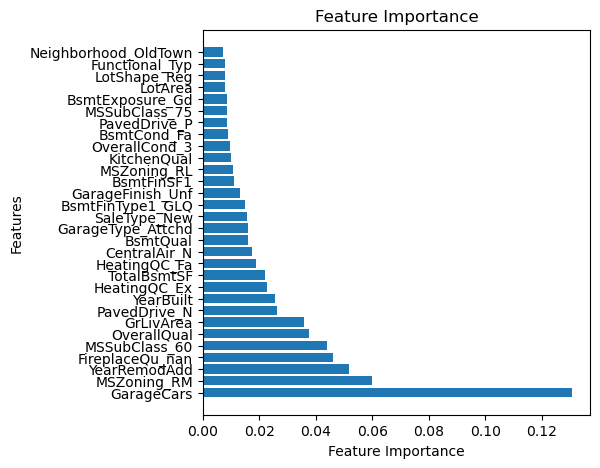

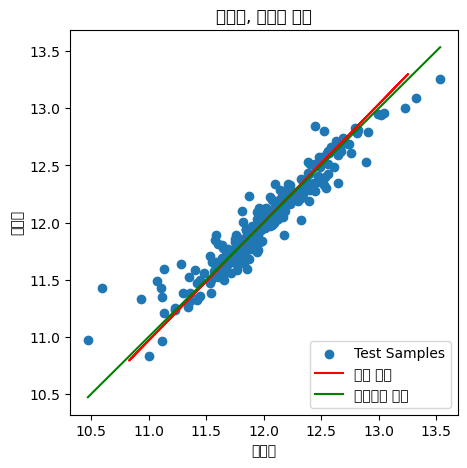

In [48]:
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

# XGBoost 모델
model_XGBoost = xgb.XGBRegressor(max_depth=3, n_estimators=600, learning_rate=0.1)
model_XGBoost.fit(X_train, y_train)
model_val(model_XGBoost, X_train, y_train)
feature_importance(model_XGBoost, X_train, 30)
visualize_model_predictions(model_XGBoost, X_test, y_test)

2. Gradient Boosting

CV Fold 1 - Score: 0.0843, MSE: 0.0156, RMSE: 0.1247
CV Fold 2 - Score: 0.0953, MSE: 0.0205, RMSE: 0.1432
CV Fold 3 - Score: 0.0945, MSE: 0.0229, RMSE: 0.1514
CV Fold 4 - Score: 0.0922, MSE: 0.0165, RMSE: 0.1285
CV Fold 5 - Score: 0.0761, MSE: 0.0116, RMSE: 0.1075
RMSE 평균: 0.13107520155264699
RMSE 표준편차: 0.015263265289767224


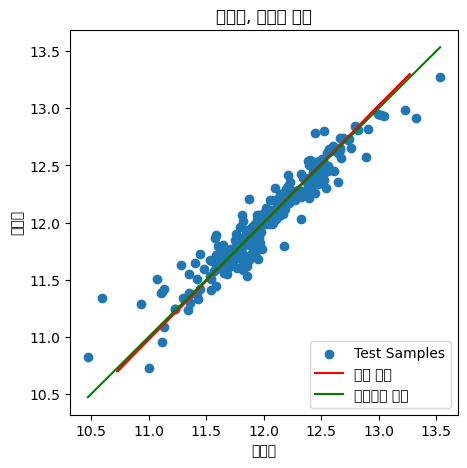

In [49]:
# Gradient Boosting 모델
model_Gradient = GradientBoostingRegressor(max_depth=3, n_estimators=600, learning_rate=0.1)
model_Gradient.fit(X_train, y_train)
#교차검증 함수
model_val(model_Gradient, X_train, y_train)
#중요도 시각화
# feature_importance(model_Gradient, X_train, 30)
visualize_model_predictions(model_Gradient, X_test, y_test)

In [50]:
submission_test=test.drop('SalePrice',axis=1)
submission_y_pred = model_XGBoost.predict(submission_test)
submission = pd.DataFrame()
submission['Id'] = test.index
submission['SalePrice'] = np.expm1(submission_y_pred)
# submission.to_csv(r"C:\Users\USER\Desktop\캐글 모델링\boston house\submission\6_submit.csv", index=False)

OSError: Cannot save file into a non-existent directory: 'C:\Users\USER\Desktop\캐글 모델링\boston house\submission'